In [1]:
%%bash
git clone https://github.com/AlexK49831/Darknet-YOLO-Bubbles
cd Darknet-YOLO-Bubbles
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -W

Cloning into 'Darknet-YOLO-Bubbles'...
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~


In [2]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-06-09 14:42:35--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  69.2KB/s    in 29m 15s 

2020-06-09 15:11:52 (90.4 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%%bash
cd ./Darknet-YOLO-Bubbles/
./darknet detector \
        train \
        cfg/bubble.data \
        cfg/bubble-frozen.cfg \
        /content/darknet53.conv.74 > /content/log

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
%cp /content/Darknet-YOLO-Bubbles/backup/bubble-* /content/gdrive/My\ Drive/tmp/

In [0]:
%cp /content/log /content/gdrive/My\ Drive/tmp/

In [16]:
%%bash
cd ./Darknet-YOLO-Bubbles/
./darknet detector test cfg/bubble.data cfg/bubble.cfg /content/gdrive/My\ Drive/tmp/bubble-frozen_final.weights /content/gdrive/My\ Drive/tmp/00059670.jpg

/content/gdrive/My Drive/tmp/00059670.jpg: Predicted in 0.349044 seconds.
Bubble: 99%
Bubble: 99%
Bubble: 99%
Bubble: 99%
Bubble: 98%
Bubble: 98%
Bubble: 98%
Bubble: 98%
Bubble: 98%
Bubble: 97%
Bubble: 97%
Bubble: 97%
Bubble: 97%
Bubble: 97%
Bubble: 96%
Bubble: 96%
Bubble: 96%
Bubble: 96%
Bubble: 96%
Bubble: 96%
Bubble: 95%
Bubble: 94%
Bubble: 94%
Bubble: 94%
Bubble: 93%
Bubble: 93%
Bubble: 93%
Bubble: 93%
Bubble: 93%
Bubble: 92%
Bubble: 92%
Bubble: 92%
Bubble: 92%
Bubble: 91%
Bubble: 91%
Bubble: 90%
Bubble: 90%
Bubble: 90%
Bubble: 88%
Bubble: 88%
Bubble: 88%
Bubble: 88%
Bubble: 87%
Bubble: 87%
Bubble: 86%
Bubble: 85%
Bubble: 84%
Bubble: 83%
Bubble: 83%
Bubble: 83%
Bubble: 82%
Bubble: 82%
Bubble: 81%
Bubble: 80%
Bubble: 79%
Bubble: 78%
Bubble: 78%
Bubble: 78%
Bubble: 77%
Bubble: 77%
Bubble: 77%
Bubble: 76%
Bubble: 75%
Bubble: 72%
Bubble: 72%
Bubble: 71%
Bubble: 66%
Bubble: 63%
Bubble: 62%
Bubble: 61%
Bubble: 60%
Bubble: 59%
Bubble: 58%
Bubble: 55%
Bubble: 53%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

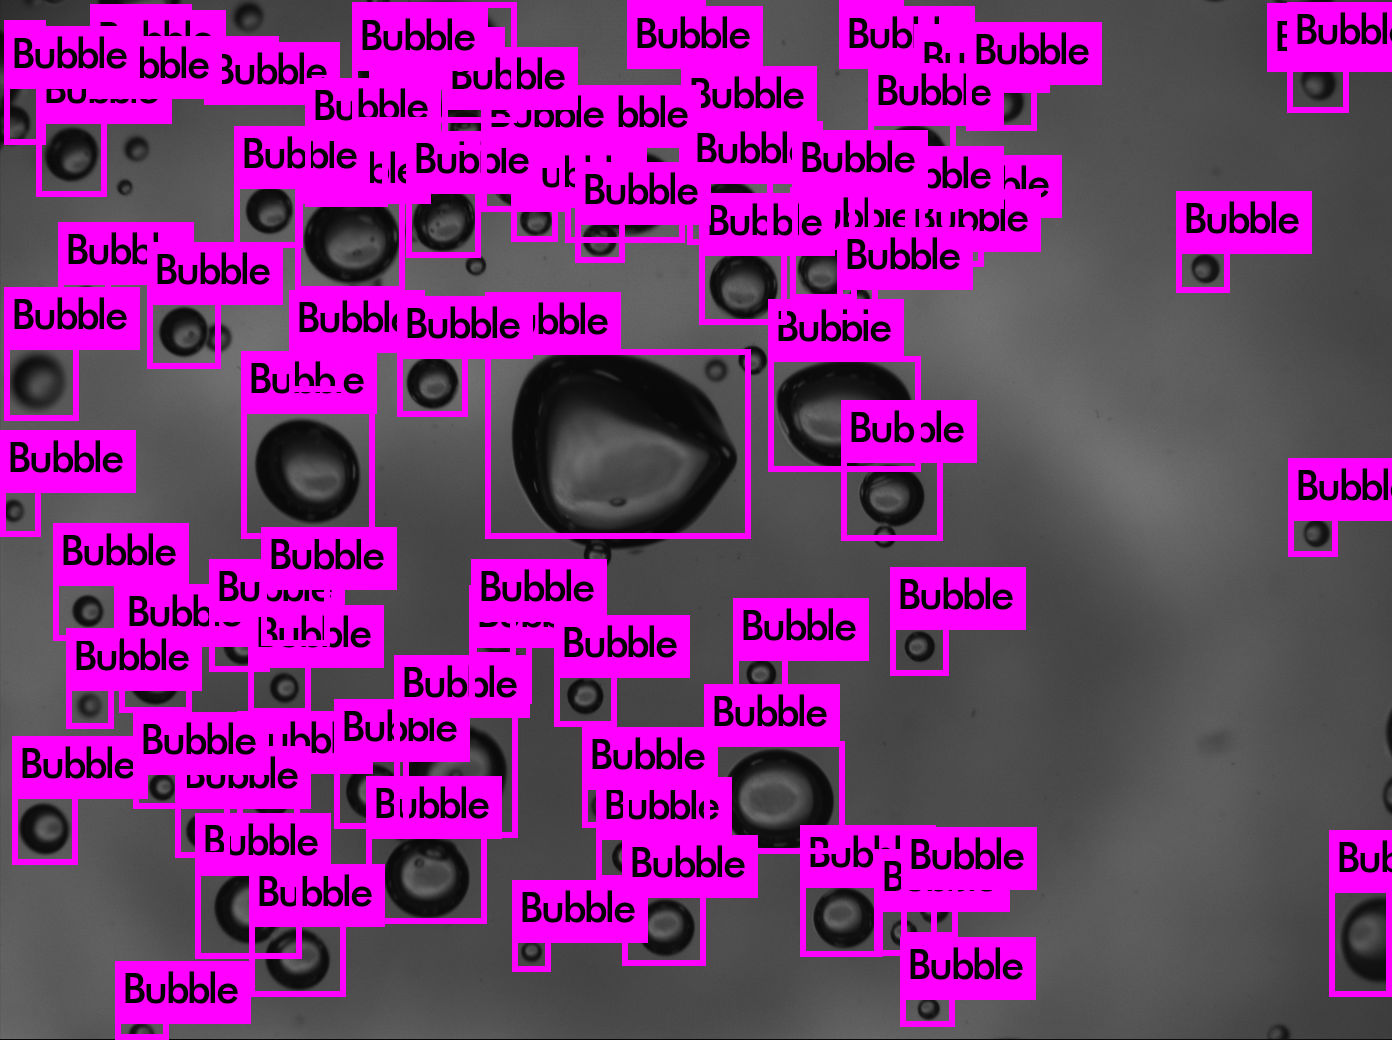

In [17]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('Darknet-YOLO-Bubbles/predictions.jpg'))

In [0]:
%cp /content/Darknet-YOLO-Bubbles/predictions.jpg /content/gdrive/My\ Drive/tmp